In [134]:
files <- dir("functions",full.names=TRUE)
for(i in 1:length(files)) source(files[i])

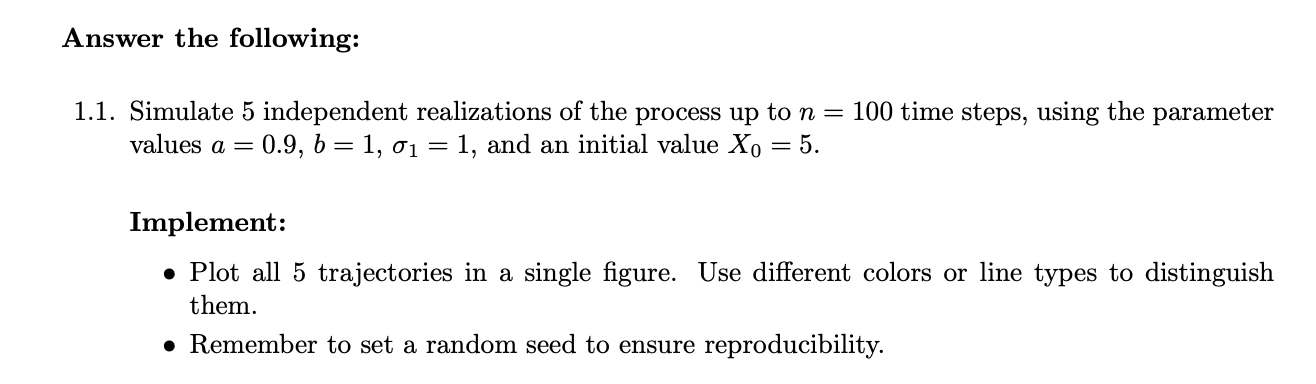

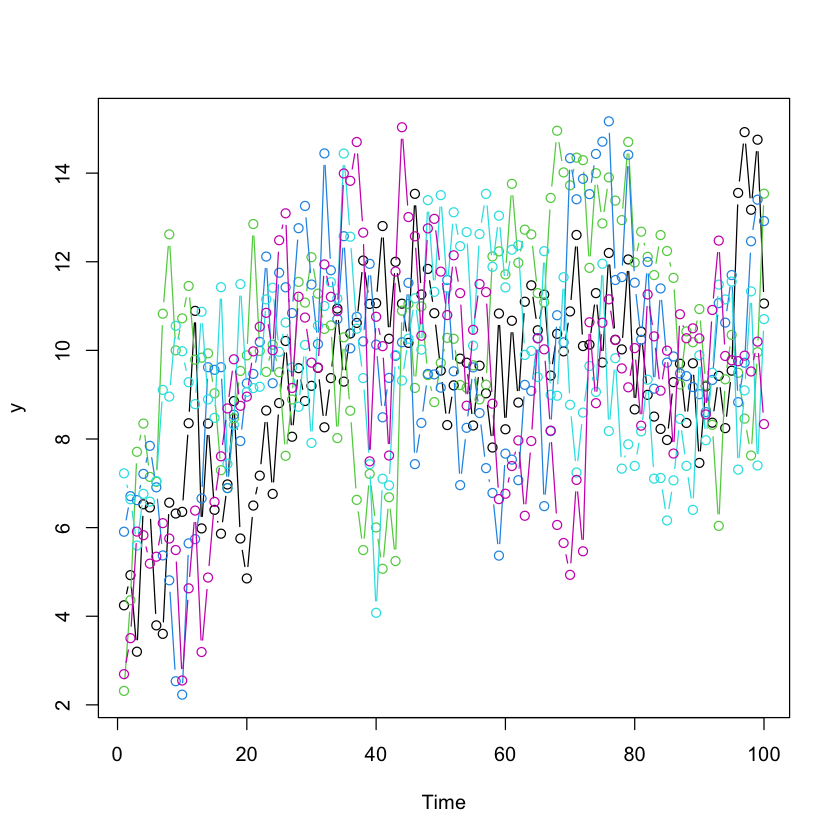

In [135]:
set.seed(25)
A <- 0.9
B <- 1
C <- 1
X0 <- 5
n <- 100
y <- matrix(NA, nrow = n, ncol = 5)
for (j in 1:5){
X <- X0
for (i in 1:n){
    X <- A * X + B + rnorm(1)
    y[i,j] <- C*X +  rnorm(1)
}
}

par(bg="white")
plot(y[,1], type="b", xlab="Time", ylab="y", ylim=range(y,na.rm=TRUE))
for (i in 2:5){
    lines(y[,i], type="b",col = i+1)
}

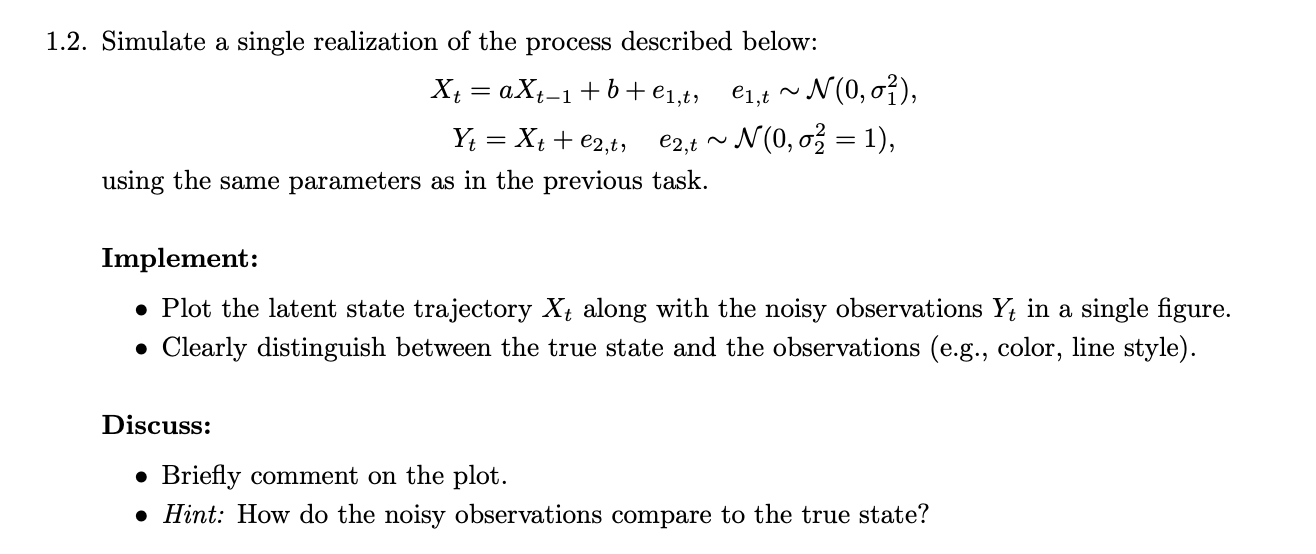

NA
4.246575
4.927574
3.199775
6.526118
6.455094
3.793946
3.602691
6.563434
6.317900
6.356071


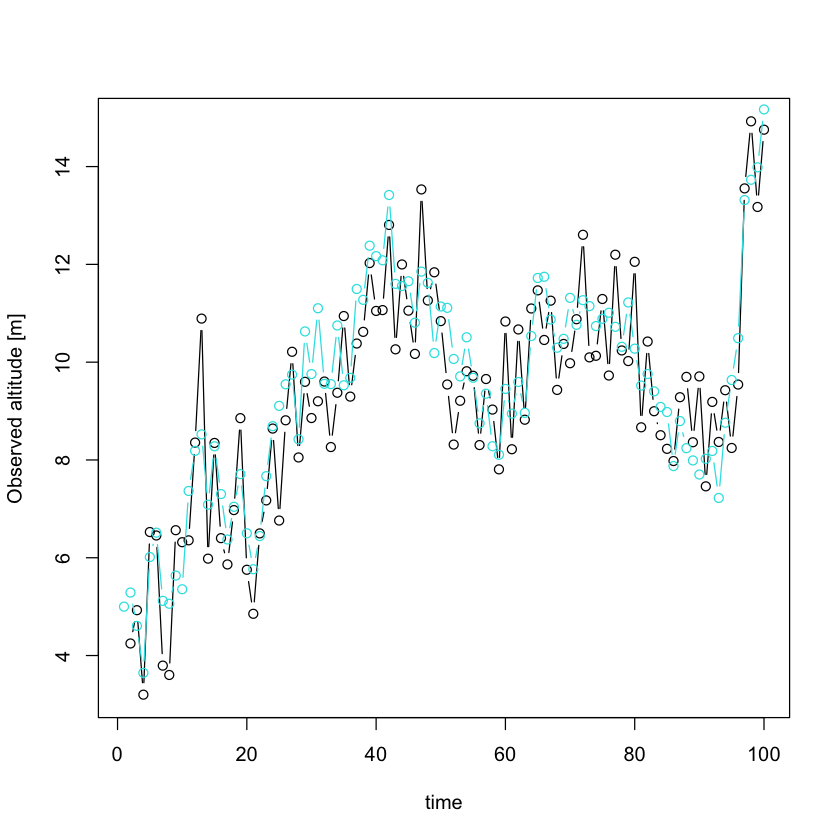

In [136]:
set.seed(25)
A <- 0.9
B <- 1
C <- 1
X0 <- 5
n <- 100
X <- matrix(NA, n)
y <- matrix(NA, n)

X[1] <- X0
for (i in 2:n){
    X[i] <- A * X[i-1] + B + rnorm(1)
    y[i] <- C*X[i] +  rnorm(1)
}

par(bg="white")
plot(y, type="b", xlab="time", ylab="Observed altitude [m]", ylim=range(y,na.rm=TRUE))
lines(X, type="b",col=5)
y

In [137]:
results <- myKalmanFilter(y = y[2:length(y)],theta = c(1,0.9,1),R = 1, x_prior = 5, P_prior = 1000)

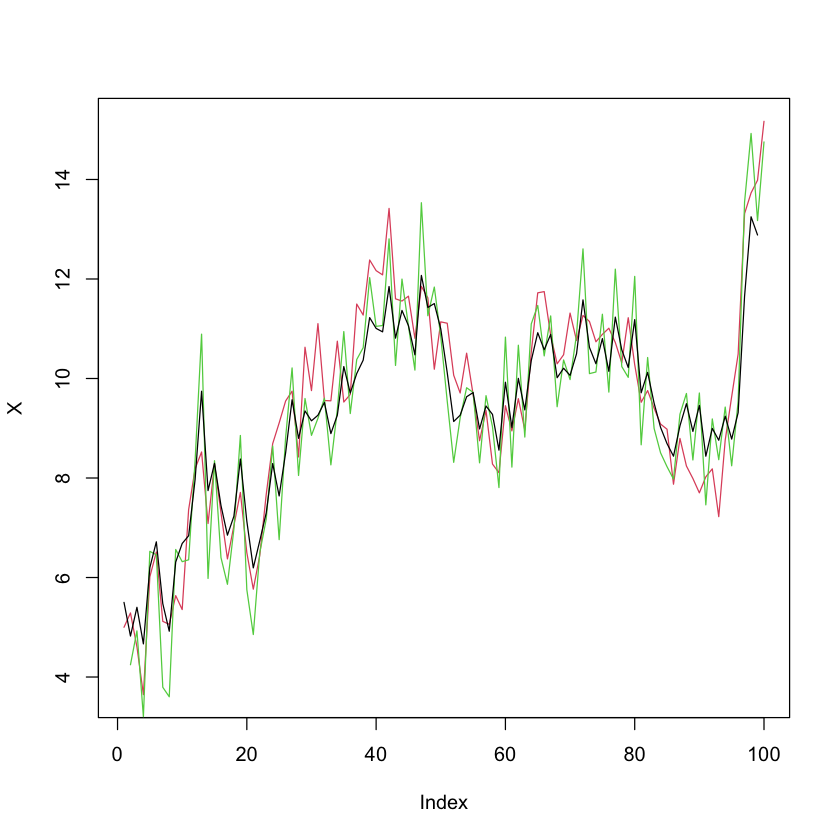

In [138]:
par(bg="white")
plot(X,type="l",col=2)
lines(y,type = "l",col = 3)
lines(results$x_pred,type = "l",col = 1)

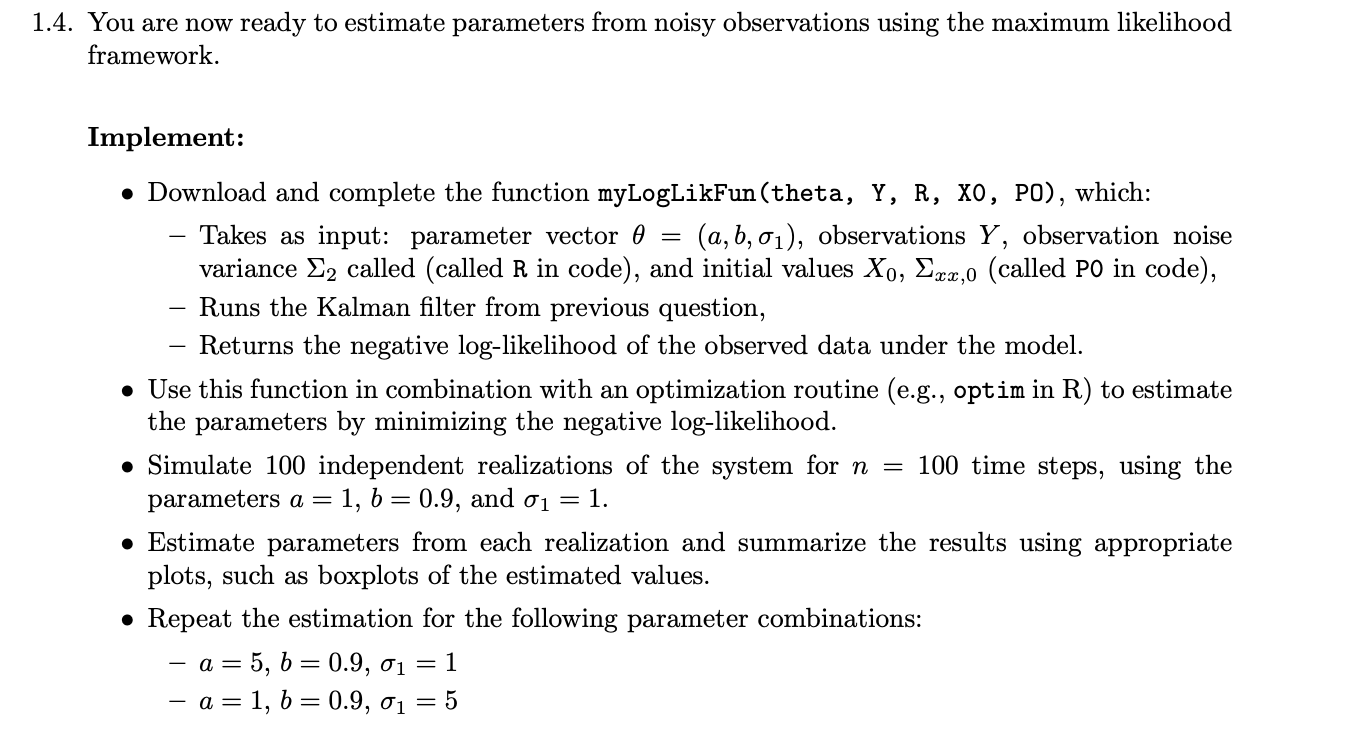

In [139]:
myLogLikFun(y = y[2:100],theta = c(1,0.9,1),R = 1, x_prior = 5, P_prior = 1000)

[1] 90.29192

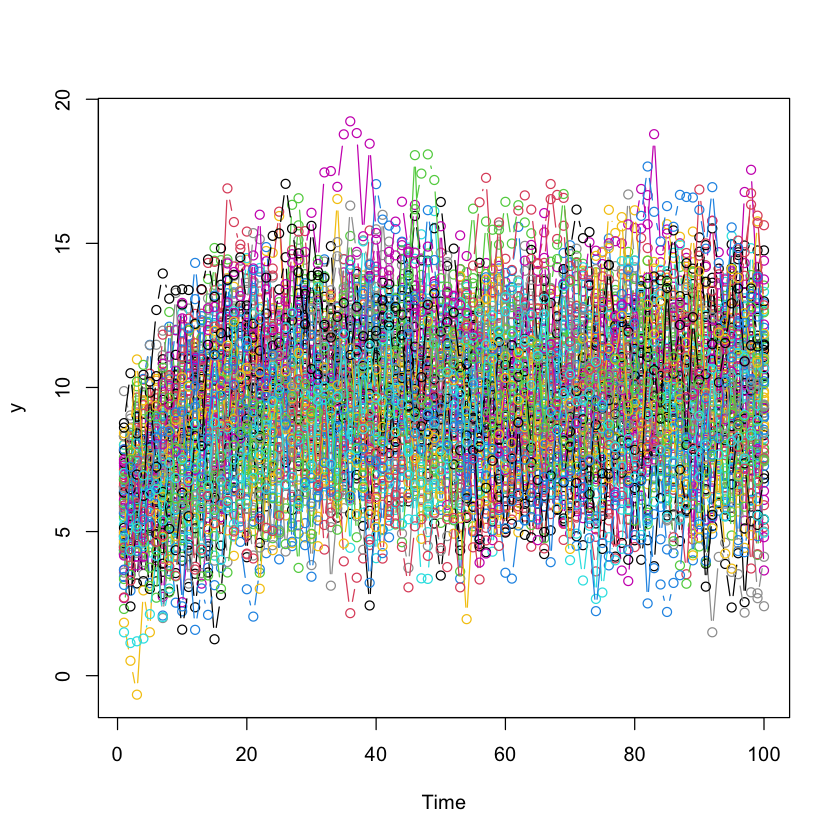

In [140]:
set.seed(25)
A <- 0.9
B <- 1
C <- 1
X0 <- 5
n <- 100
y <- matrix(NA, nrow = n, ncol = n)
for (j in 1:n){
X <- X0
for (i in 1:n){
    X <- A * X + B + rnorm(1)
    y[i,j] <- C*X +  rnorm(1)
}
}

par(bg="white")
plot(y[,1], type="b", xlab="Time", ylab="y", ylim=range(y,na.rm=TRUE))
for (i in 2:n){
    lines(y[,i], type="b",col = i+1)
}


In [146]:
optim(fn=myLogLikFun, par = c(1,1,1), y=y[,1], R=1, x_prior = 0, P_prior=10)$par

[1] 1.0166306 0.8993740 0.5527382

In [ ]:
Estimatedparameters <- matrix(NA, nrow = n, ncol = 3)
for (i in 1:n){
Estimatedparameters[i,] <- optim(fn=myLogLikFun, par = c(5,5,5), y=y[,i], R=1, x_prior = 0, P_prior=10)$par
}

Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning mes

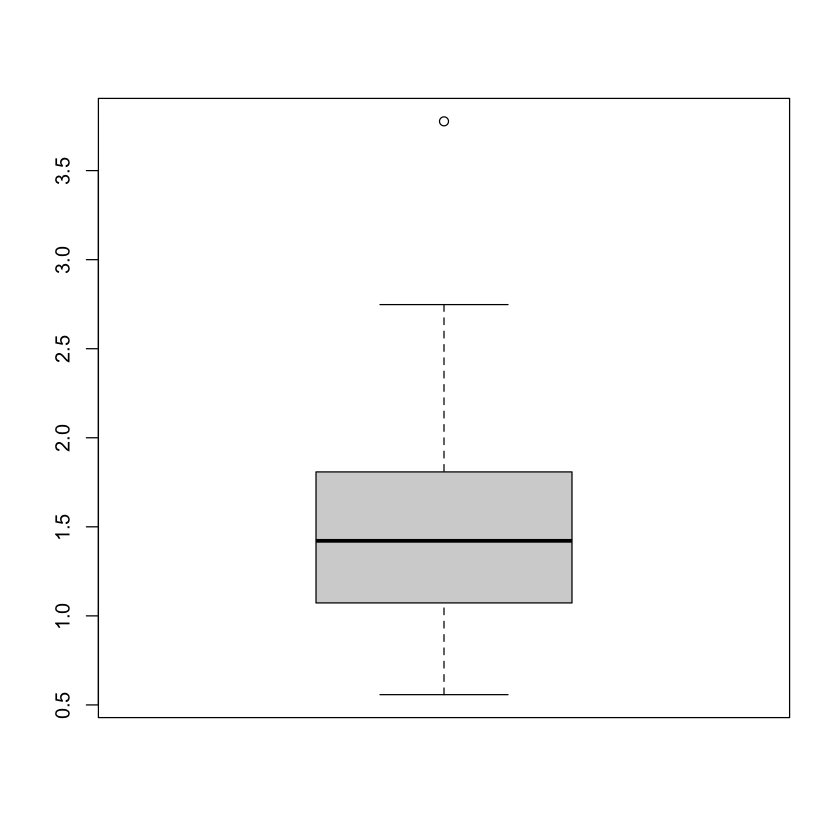

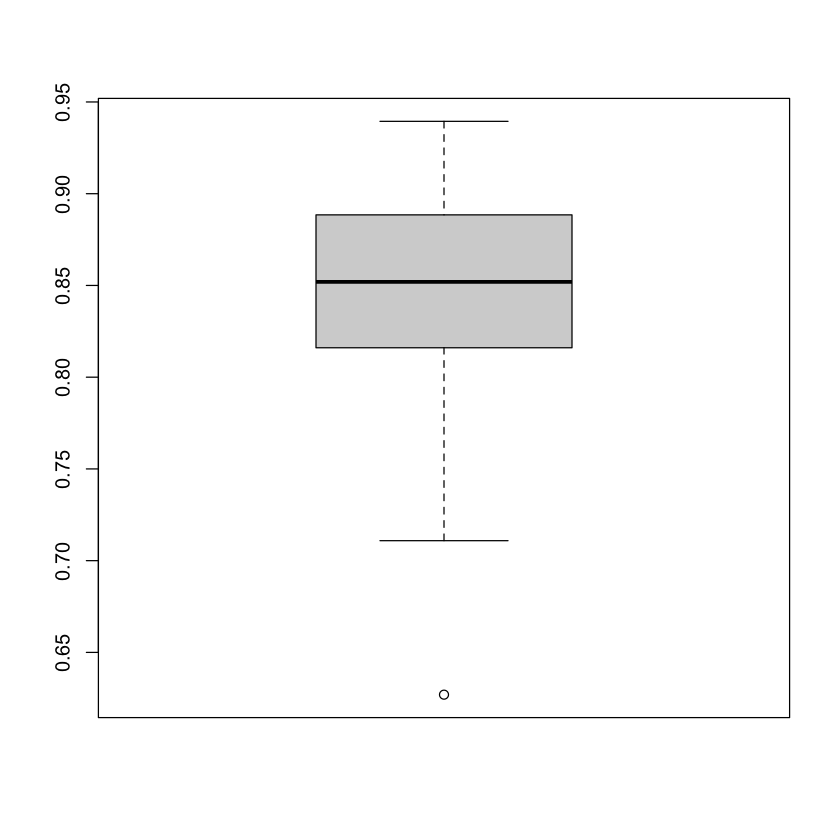

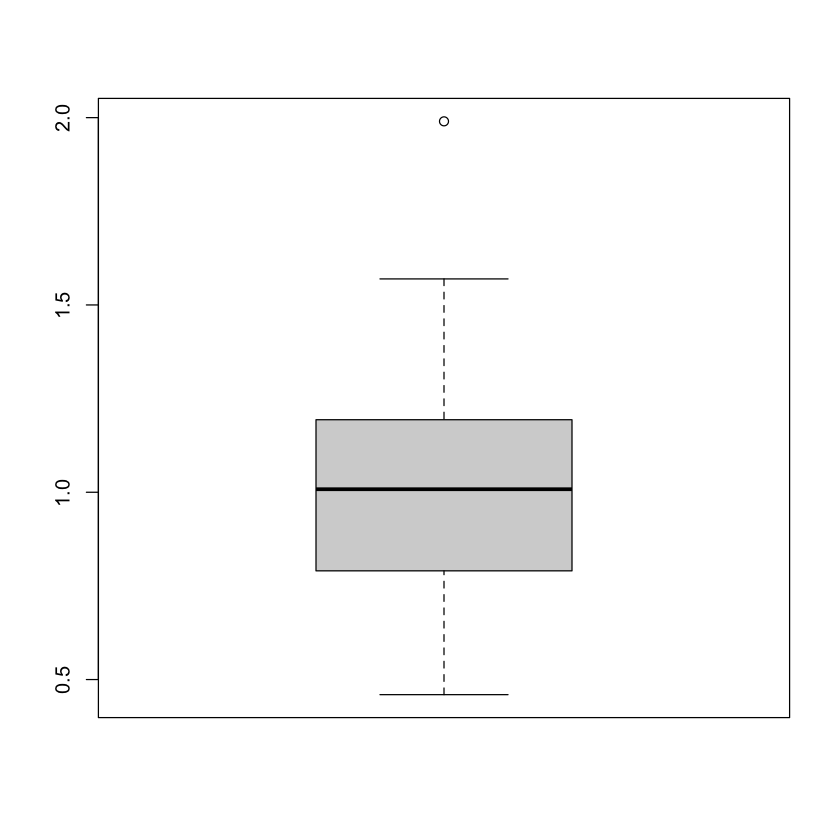

In [153]:
for (i in 1:3){
    boxplot(Estimatedparameters[,i])
}